# Analyse mgnify data

In [ ]:
%load_ext autoreload
%autoreload 2

import src.mgnify_helper_functions as mhf

mgnify_data = mhf.MGnifyData(cache_folder='data/')

### Study sizes analysis
---

In [14]:
study_sizes = mgnify_data.get_study_sample_sizes()

No more pages available.


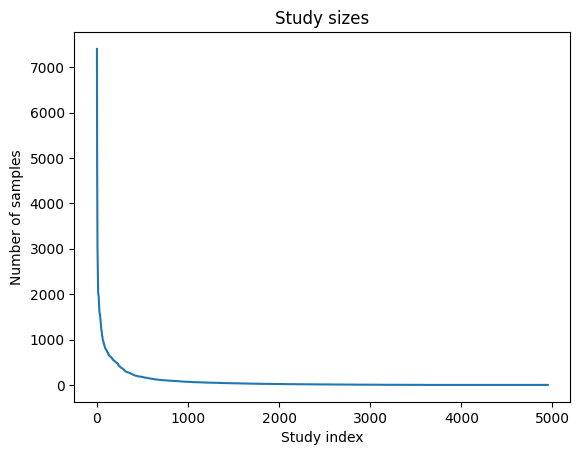

In [42]:
import json
import matplotlib.pyplot as plt

with open('data/study_sizes.json', "r") as file:
    checkpoint = json.load(file)
study_sizes = checkpoint["study_sizes"]
study_sizes = {k: v for k, v in study_sizes.items() if v is not None}
sizes = sorted(study_sizes.values(), reverse=True)

# plot long-tailedness of study sizes
plt.plot(range(len(sizes[1:])), sizes[1:])
plt.xlabel('Study index')
plt.ylabel('Number of samples')
plt.title('Study sizes')
plt.show()



<font color=green>

<font color="green"> We indeed observe that most datasets have a sample size smaller than 1000.</font>

---

In [ ]:

study_sizes_tuple = [(k, v) for k, v in study_sizes.items()]
study_sizes_tuple.sort(key=lambda x: x[1], reverse=True)
study_sizes_tuple[:50]

### Studies with GO summary analysis (To Be Done)

In [ ]:
s = mhf.studies_with_desired_summaries()

In [ ]:
print(s)
import json
with open('result.json', 'w') as fp:
    json.dump(s, fp)

from jsonapi_client import Session

# BASE_API = "https://www.ebi.ac.uk/metagenomics/api/latest/"
                                  

# download_path = "studies/MGYS00001980/downloads"
# with Session(BASE_API) as mgnify:
#     downloads = mgnify.get(download_path)
#     print(type(downloads.resources[0].description.label))
#     # print(float(downloads.resources[0].pipeline.id))

{'MGYS00006736': [], 'MGYS00006725': [], 'MGYS00001228': [], 'MGYS00006570': ['5.0'], 'MGYS00001980': ['4.0', '5.0']}


### Difference between v4.0 and v5.0 for a dataset

In [108]:
import pandas as pd

MGYS00001980_v4 = pd.read_table("data/MGYS00001980(two_pipelines)/ERP103961_GO_abundances_v4.0.tsv", usecols=["GO", "description", "category"])
MGYS00001980_v5 = pd.read_table("data/MGYS00001980(two_pipelines)/ERP103961_GO_abundances_v5.0.tsv", usecols=["GO", "description", "category"])

print(len(set(MGYS00001980_v4["GO"])), "vs", len(set(MGYS00001980_v5["GO"])))

v4_descriptions = MGYS00001980_v4["description"]
v5_descriptions = MGYS00001980_v5["description"]
print("difference in descriptions")
print(set(v4_descriptions) - set(v5_descriptions), "\n of length", len(set(v4_descriptions) - set(v5_descriptions)))
print(set(v5_descriptions) - set(v4_descriptions), "\n of length", len(set(v5_descriptions) - set(v4_descriptions)))

v4_GO = MGYS00001980_v4["GO"]
v5_GO = MGYS00001980_v5["GO"]
print("difference in GO")
print(set(v4_GO) - set(v5_GO), "\n of length", len(set(v4_GO) - set(v5_GO)))
print(set(v5_GO) - set(v4_GO), "\n of length", len(set(v5_GO) - set(v4_GO)))

3171 vs 2978
difference in descriptions
{'fusion of virus membrane with host plasma membrane', 'cell motility', 'plasminogen activation', 'protein kinase inhibitor activity', 'guanylate cyclase activator activity', '3-hydroxyanthranilate 3,4-dioxygenase activity', 'suppression by virus of host apoptotic process', 'electron transporter, transferring electrons within cytochrome b6/f complex of photosystem II activity', 'ribonucleoside-diphosphate reductase activity, thioredoxin disulfide as acceptor', 'transferase activity, transferring amino-acyl groups', 'calcium- and calmodulin-responsive adenylate cyclase activity', 'pyruvate, water dikinase activity', 'oxidoreductase activity, acting on the CH-NH2 group of donors, NAD or NADP as acceptor', 'propanediol dehydratase activity', 'cell morphogenesis involved in conjugation with cellular fusion', 'sodium:potassium-exchanging ATPase activity', 'nicotinate nucleotide biosynthetic process', 'toxin-antitoxin complex', 'host cell cytoplasm', '

<font color="green">We see that for the same study, different pipelines give different functional features</font>

---

### Feature space overlap between v4.1-GO annotations summary of 5 difference studies
##### GO annotations

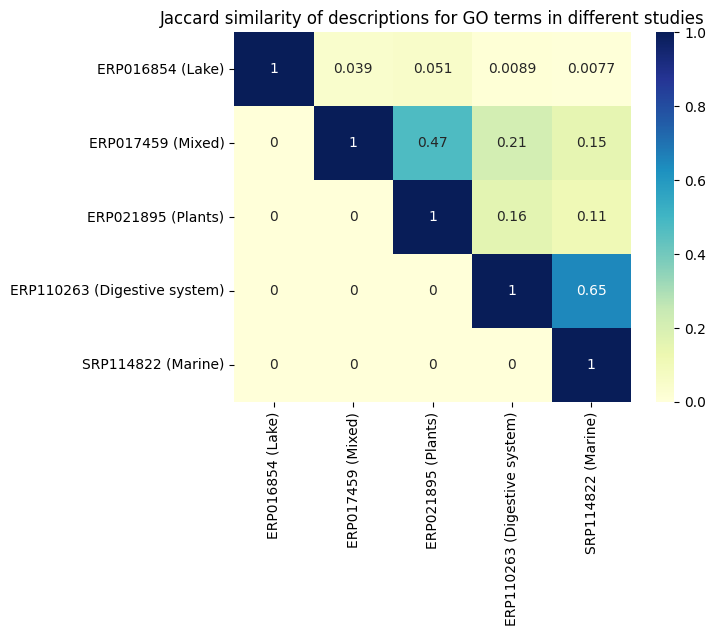

In [ ]:
biomes_of_data = {"ERP016854": "root:Environmental:Aquatic:Freshwater:Lake",
                   "ERP017459": "root:Mixed",
                   "ERP021895": "root:Host-associated:Plants",
                   "ERP110263": "root:Host-associated:Human:Digestive system",
                   "SRP114822": "root:Environmental:Aquatic:Marine"}

mhf.plot_jaccard_similarities(dir_path="data/largest_5_studies_GO_v4.1_summary",
                              column_name="description",
                              title="Jaccard similarity of descriptions for GO terms in different studies",
                              biome_dict=biomes_of_data,
)
                   


<font color="green">We see that studies of different biomes analysed with the same pipeline give drastically different features (functions found) if full GO annotations data is used.</font>

##### GO slim data

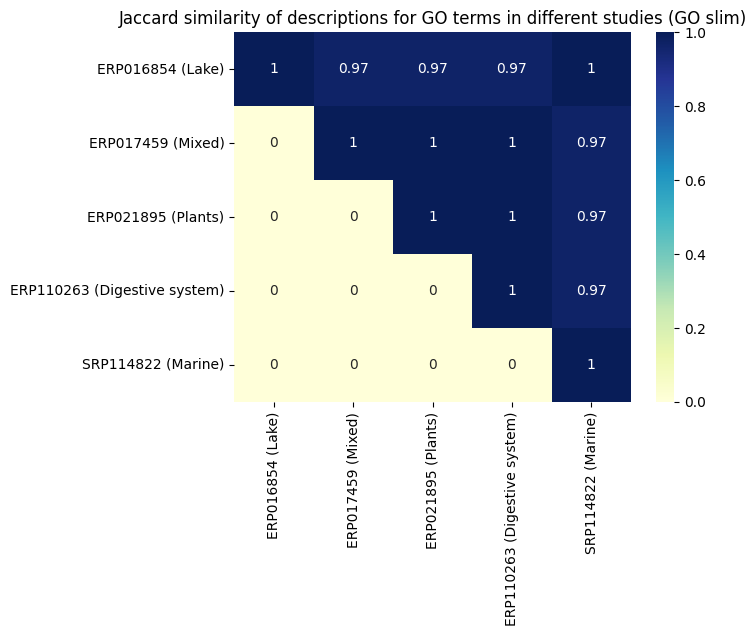

In [5]:
mhf.plot_jaccard_similarities(dir_path="data/largest_5_studies_GO_slim_v4.1_summary",
                              column_name="description",
                              title="Jaccard similarity of descriptions for GO terms in different studies (GO slim)",
                              biome_dict=biomes_of_data,
)

<font color="green">But the features overlap almost entirely if the GO slim datasets are used.</font>

---

### Feature space overlap between v5-GO annotations summary of 5 difference studies
##### GO annotations

In [ ]:
%load_ext autoreload
%autoreload 2
import src.mgnify_helper_functions as mhf


mgnify = mhf.MGnifyData(cache_folder='data/mgnify_data')

all_study_accessions = mgnify.get_study_accessions()

2024-11-27 15:31:37.079 | SUCCESS  | mgnify_helper_functions:get_study_accessions:146 - Found 250 studies with desired biomes.


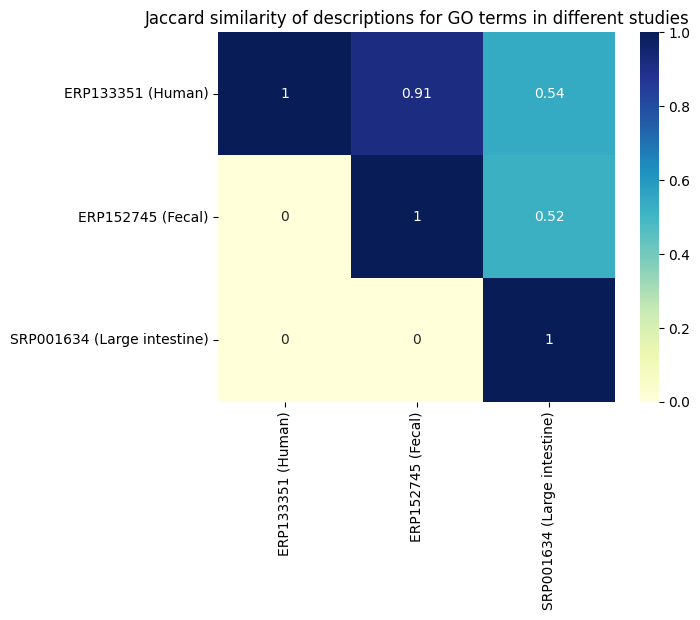

In [ ]:
biomes_of_data = {"ERP133351": "root:Host-associated:Human",
                   "ERP152745": "root:Host-associated:Human:Digestive system:Large intestine:Fecal",
                   "SRP001634": "root:Host-associated:Human:Digestive system:Large intestine"}

mhf.plot_jaccard_similarities(dir_path="manually_obtained_data/largest_5_studies_GO_v5.0_summary",
                              column_name="description",
                              title="Jaccard similarity of descriptions for GO terms in different studies",
                              biome_dict=biomes_of_data,
)


<font color="green">Even the same pipeline differs in feature space.</font>

### Feature space overlap between v4.1-GO annotations summary of 5 difference studies of same biome

##### Go annotations

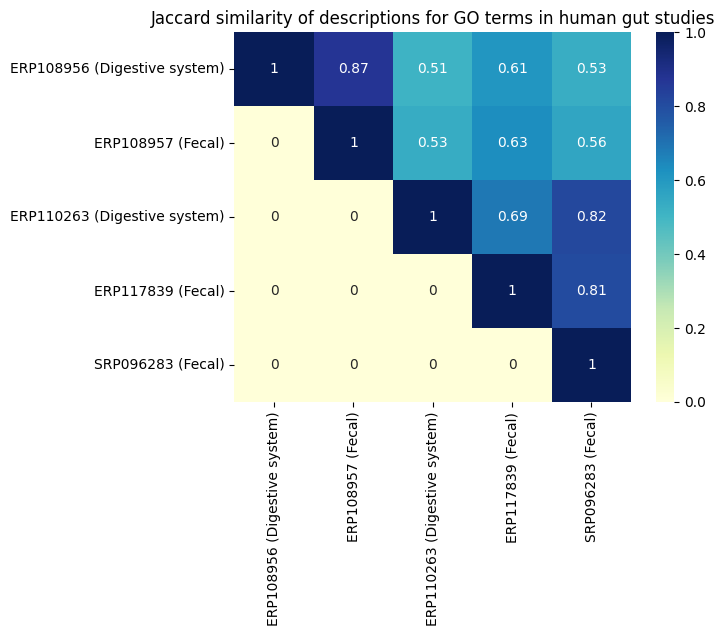

In [3]:
import os
import pandas as pd

biomes_of_data = {"ERP108956": "root:Host-associated:Human:Digestive system",
                  "ERP108957": "root:Host-associated:Human:Digestive system:Large intestine:Fecal",
                  "ERP110263": "root:Host-associated:Human:Digestive system",
                  "ERP117839": "root:Host-associated:Human:Digestive system:Large intestine:Fecal",
                  "SRP096283": "root:Host-associated:Human:Digestive system:Large intestine:Fecal"
                  }

mhf.plot_jaccard_similarities(dir_path="data/human_gut_largest_5_studies_GO_v4.1_summary",
                                column_name="description",
                                title="Jaccard similarity of descriptions for GO terms in human gut studies",
                                biome_dict=biomes_of_data,
    )


<font color="green">We see that even if the biomes are the same and analysis is done with the same pipeline, the features (functions found) can be different.</font>

##### Go slim data

In [4]:
based_download_url = "https://www.ebi.ac.uk/metagenomics/api/v1/studies/{}/pipelines/4.1/file/{}_GO-slim_abundances_v4.1.tsv"

accessions = mgnify_data.get_id_from_secondary_accession([k for k in biomes_of_data.keys()])
print(accessions)
links = {}
for sec_accession, id in accessions.items():
    links[sec_accession] = based_download_url.format(id, sec_accession)
    
mgnify_data.download_summary_for_study(links, "data/human_gut_largest_5_studies_GO_slim_v4.1_summary/")

{'ERP108956': 'MGYS00003619', 'ERP108957': 'MGYS00003481', 'ERP110263': 'MGYS00004712', 'ERP117839': 'MGYS00005128', 'SRP096283': 'MGYS00003733'}
data/human_gut_largest_5_studies_GO_slim_v4.1_summary/ERP108956_GO-slim_abundances_v4.1.tsv
data/human_gut_largest_5_studies_GO_slim_v4.1_summary/ERP108957_GO-slim_abundances_v4.1.tsv
data/human_gut_largest_5_studies_GO_slim_v4.1_summary/ERP110263_GO-slim_abundances_v4.1.tsv
data/human_gut_largest_5_studies_GO_slim_v4.1_summary/ERP117839_GO-slim_abundances_v4.1.tsv
data/human_gut_largest_5_studies_GO_slim_v4.1_summary/SRP096283_GO-slim_abundances_v4.1.tsv


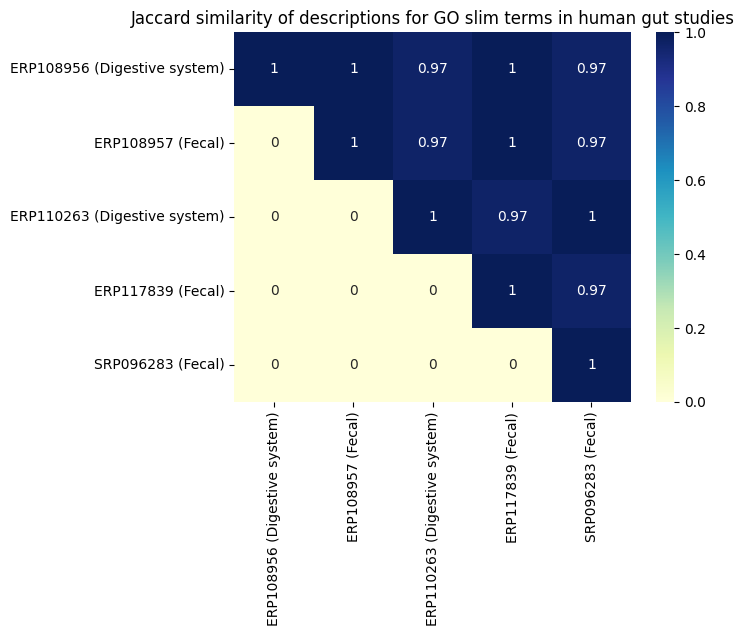

In [23]:
mhf.plot_jaccard_similarities(dir_path="data/human_gut_largest_5_studies_GO_slim_v4.1_summary",
                                column_name="description",
                                title="Jaccard similarity of descriptions for GO slim terms in human gut studies",
                                biome_dict=biomes_of_data,
    )

---

### Feature space overlap between v4.1-taxonomic SSU summary of 5 difference studies of same biome

Text(0.5, 1.0, 'Jaccard similarity of Genus level taxonomic SSU')

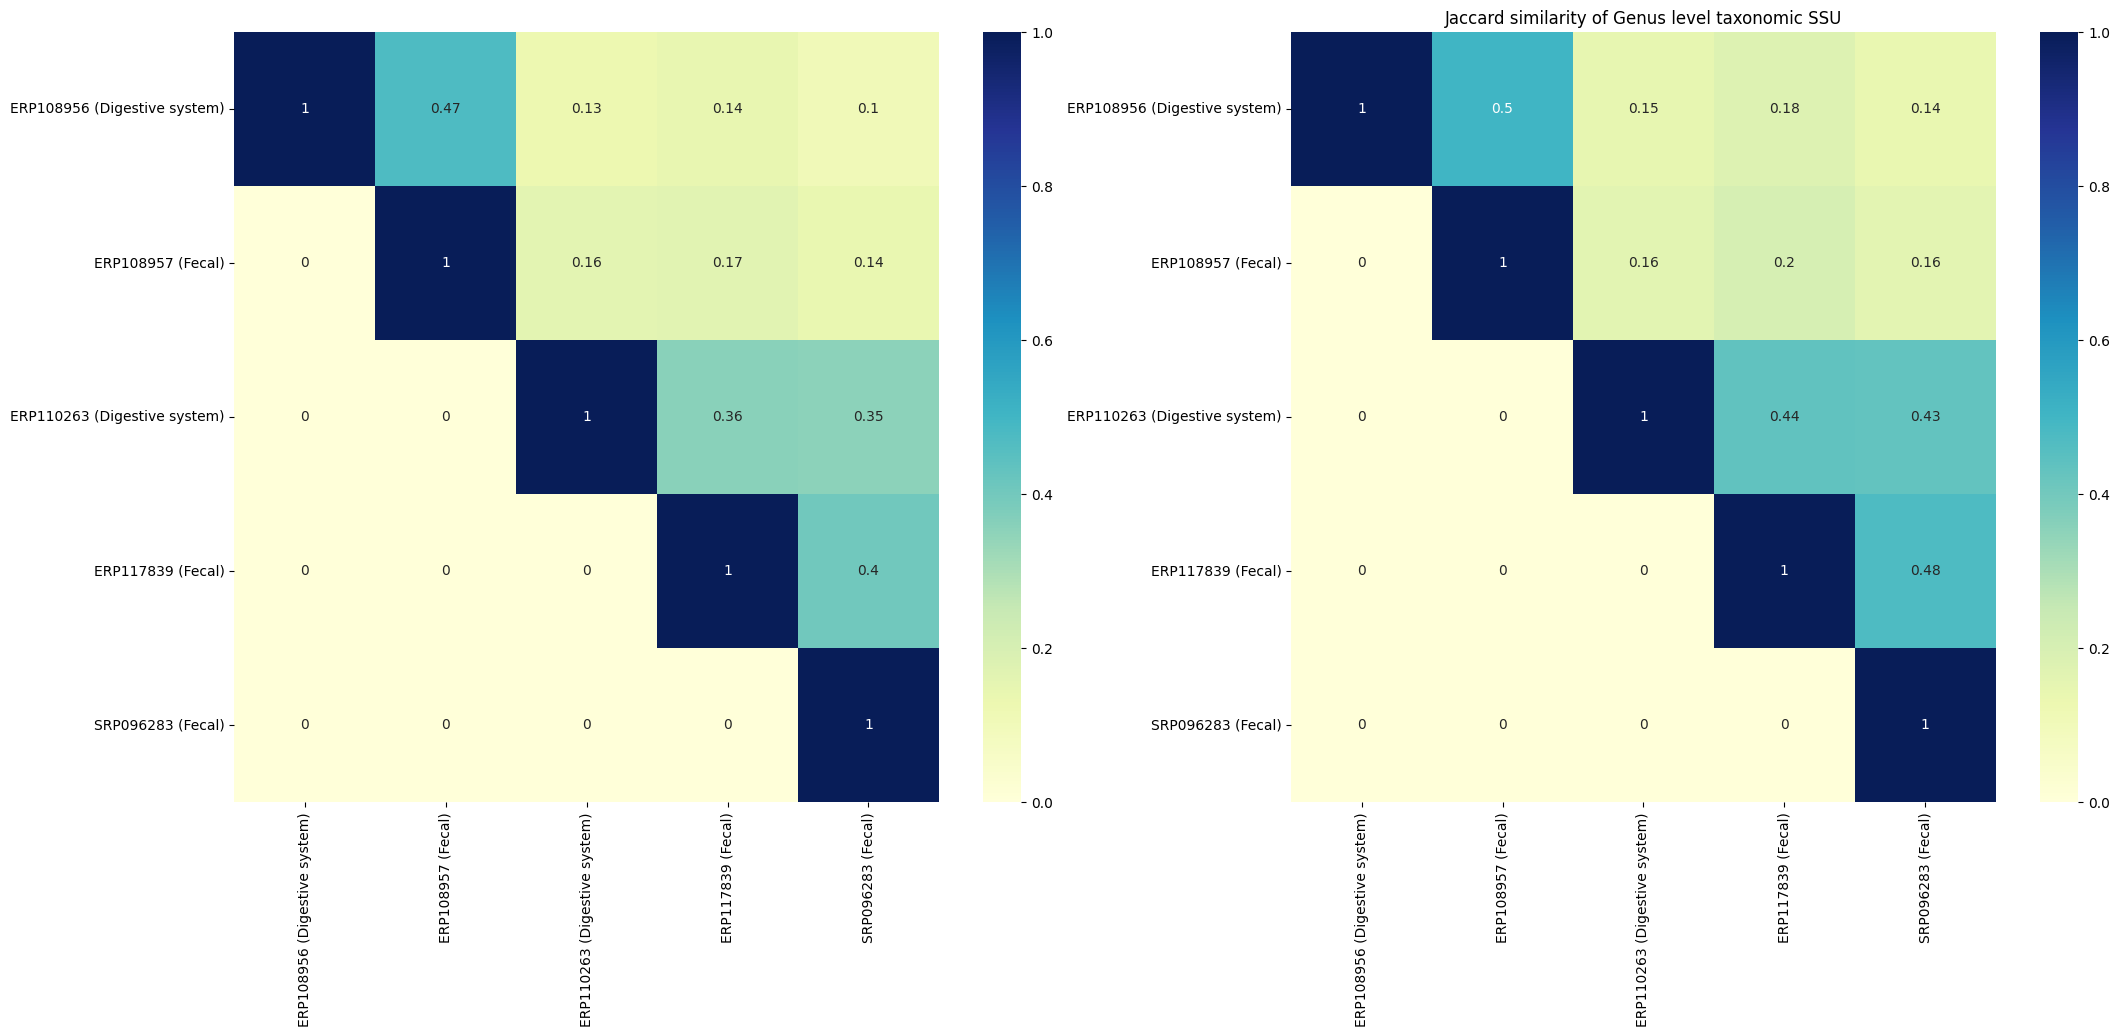

In [ ]:
# get dataframe for each tsv file in "data/largest_5_studies_GO_v4.1_summary" directory

# jaccard Similarity heatmap of description of different studies
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(25, 10))

biomes_of_data = {"ERP108956": "root:Host-associated:Human:Digestive system",
                  "ERP108957": "root:Host-associated:Human:Digestive system:Large intestine:Fecal",
                  "ERP110263": "root:Host-associated:Human:Digestive system",
                  "ERP117839": "root:Host-associated:Human:Digestive system:Large intestine:Fecal",
                  "SRP096283": "root:Host-associated:Human:Digestive system:Large intestine:Fecal"
                  }

mhf.plot_jaccard_similarities(dir_path="data/human_gut_largest_5_studies_taxonomic_SSU_v4.1_summary/",
                              column_name="#SampleID",
                              title="Jaccard similarity of sample IDs for taxonomic SSU",
                              biome_dict=biomes_of_data,
                              axis=axes[0])


# Only focus on Genus level
data = {}
for file in os.listdir("data/human_gut_largest_5_studies_taxonomic_SSU_v4.1_summary"):
    if file.endswith(".tsv"):
        data[file] = pd.read_table("data/human_gut_largest_5_studies_taxonomic_SSU_v4.1_summary/" + file, usecols=["#SampleID"])

biomes = {k: v.split(":")[-1] for k, v in biomes_of_data.items()}

# These are the rows where the taxonomic level can be split by ";" and the last element starts with "g__"
for df in data.keys():
    data[df] = data[df][data[df]["#SampleID"].apply(lambda x: x.split(";")[-1].startswith("g__"))]
# triangular jaccard similarity of descriptions
jaccard_similarities = np.zeros((len(data), len(data)))
for i, (file1, df1) in enumerate(data.items()):
    for j, (file2, df2) in enumerate(data.items()):
        if i > j:
            continue
        descriptions1 = set(df1["#SampleID"])
        descriptions2 = set(df2["#SampleID"])
        jaccard_similarities[i, j] = len(descriptions1.intersection(descriptions2)) / len(descriptions1.union(descriptions2))

# plot heatmap
xticks = [file.split("_")[0] for file in data.keys()]
xticks = [x + " (" + biomes[x] + ")" for x in xticks]
sns.heatmap(jaccard_similarities, xticklabels=xticks, yticklabels=xticks, cmap="YlGnBu", annot=True, ax=axes[1])
axes[1].set_title("Jaccard similarity of Genus level taxonomic SSU")



<font color="green">We see that even if the biomes are the same and analysis is done with the same pipeline, the features (taxonomic levels found or genera found) can be different.</font>

---